<h2>Hierarchical Clustering</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path = 'D:\data science\Wholesale customers data.csv'
df = pd.read_csv(path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


As we can see that the data is not of an even range, applying any algorithm on it will make it biased towards a perticular attribute

In [3]:
normal = normalize(df)
normal_df = pd.DataFrame(normal, columns = df.columns)
normal_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


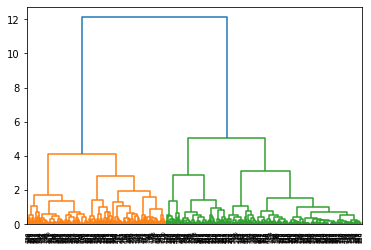

<Figure size 720x504 with 0 Axes>

In [4]:
mergings_ward = linkage(normal_df, method = 'ward')
dendrogram(mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

With complete the height to be used is 1.37 and for ward it is 6

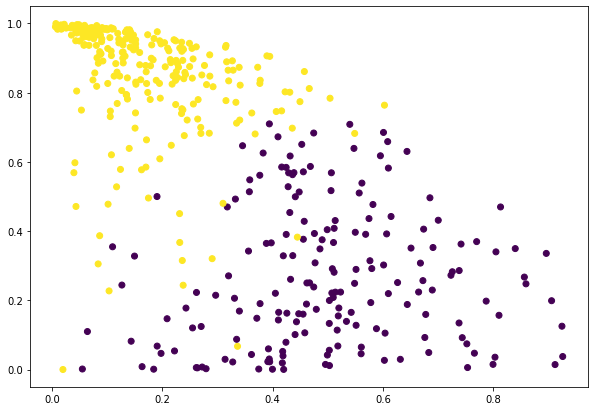

In [5]:
#Now we have to classify our modeland predict the output
labels = fcluster(mergings_ward, 6, criterion = 'distance')
plt.figure(figsize = (10, 7))
plt.scatter(normal_df['Milk'], normal_df['Fresh'], c = labels)
plt.show()